In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir('/Users/alecclarkfeather/Downloads/store_forecast/')

['test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
train_df = pd.read_csv('/Users/alecclarkfeather/Downloads/store_forecast/train.csv')
train_df.head(15)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [4]:
train_df.groupby(['date', 'country', 'store'])['num_sold'].mean()

date        country  store     
2017-01-01  Belgium  KaggleMart    617.00
                     KaggleRama    213.00
            France   KaggleMart    538.00
                     KaggleRama    196.75
            Germany  KaggleMart    637.00
                                    ...  
2020-12-31  Italy    KaggleRama    197.25
            Poland   KaggleMart    545.75
                     KaggleRama    189.75
            Spain    KaggleMart    501.50
                     KaggleRama    177.50
Name: num_sold, Length: 17532, dtype: float64

In [5]:
train_df['date_dt'] = pd.to_datetime(train_df['date'])

train_df['year_num'] = train_df['date_dt'].dt.year
train_df['month_num'] = train_df['date_dt'].dt.month
train_df['day_num'] = train_df['date_dt'].dt.day

In [6]:
import holidays
from datetime import date

In [7]:
belgium_holidays = holidays.country_holidays('BE', years=[2017, 2018, 2019, 2020, 2021])
german_holidays = holidays.country_holidays('DE', years=[2017, 2018, 2019, 2020, 2021])
spanish_holidays = holidays.country_holidays('ES', years=[2017, 2018, 2019, 2020, 2021])
polish_holidays = holidays.country_holidays('PL', years=[2017, 2018, 2019, 2020, 2021])
french_holidays = holidays.country_holidays('FR', years=[2017, 2018, 2019, 2020, 2021])
italian_holidays = holidays.country_holidays('IT', years=[2017, 2018, 2019, 2020, 2021])

In [8]:
belgium_holiday_df = pd.DataFrame(belgium_holidays.items())
belgium_holiday_df.columns = ['date', 'holiday_name']

german_holiday_df = pd.DataFrame(german_holidays.items())
german_holiday_df.columns = ['date', 'holiday_name']

spanish_holiday_df = pd.DataFrame(spanish_holidays.items())
spanish_holiday_df.columns = ['date', 'holiday_name']

polish_holiday_df = pd.DataFrame(polish_holidays.items())
polish_holiday_df.columns = ['date', 'holiday_name']

french_holiday_df = pd.DataFrame(french_holidays.items())
french_holiday_df.columns = ['date', 'holiday_name']

italian_holiday_df = pd.DataFrame(italian_holidays.items())
italian_holiday_df.columns = ['date', 'holiday_name']

In [9]:
for holiday in belgium_holiday_df['holiday_name'].unique():
    
    train_df[f'BE_holiday_{holiday}'] = 0
    
for holiday in german_holiday_df['holiday_name'].unique():
    
    train_df[f'GE_holiday_{holiday}'] = 0
    
for holiday in polish_holiday_df['holiday_name'].unique():
    
    train_df[f'PO_holiday_{holiday}'] = 0
    
for holiday in spanish_holiday_df['holiday_name'].unique():
    
    train_df[f'SP_holiday_{holiday}'] = 0
    
for holiday in french_holiday_df['holiday_name'].unique():
    
    train_df[f'FR_holiday_{holiday}'] = 0
    
for holiday in italian_holiday_df['holiday_name'].unique():
    
    train_df[f'IT_holiday_{holiday}'] = 0

In [10]:
for i in range(len(train_df)):
    
    for j1 in range(len(belgium_holiday_df)):
        
        be_date = str(belgium_holiday_df.loc[j1, 'date'])
        be_name = belgium_holiday_df.loc[j1, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == be_date:
            
            train_df.loc[i, f'BE_holiday_{be_name}'] = 1
            
    for j2 in range(len(german_holiday_df)):
        
        ge_date = str(german_holiday_df.loc[j2, 'date'])
        ge_name = german_holiday_df.loc[j2, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == ge_date:
            
            train_df.loc[i, f'GE_holiday_{ge_name}'] = 1
            
    for j3 in range(len(polish_holiday_df)):
        
        po_date = str(polish_holiday_df.loc[j3, 'date'])
        po_name = polish_holiday_df.loc[j3, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == po_date:
            
            train_df.loc[i, f'PO_holiday_{po_name}'] = 1
            
    for j4 in range(len(french_holiday_df)):
        
        fr_date = str(french_holiday_df.loc[j4, 'date'])
        fr_name = french_holiday_df.loc[j4, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == fr_date:
            
            train_df.loc[i, f'FR_holiday_{fr_name}'] = 1
            
    for j5 in range(len(spanish_holiday_df)):
        
        sp_date = str(spanish_holiday_df.loc[j5, 'date'])
        sp_name = spanish_holiday_df.loc[j5, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == sp_date:
            
            train_df.loc[i, f'SP_holiday_{sp_name}'] = 1
            
    for j6 in range(len(italian_holiday_df)):
        
        it_date = str(italian_holiday_df.loc[j6, 'date'])
        it_name = italian_holiday_df.loc[j6, 'holiday_name']
        
        if str(train_df.loc[i, 'date']) == it_date:
            
            train_df.loc[i, f'IT_holiday_{it_name}'] = 1

In [11]:
train_df.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_holiday_Pasqua di Resurrezione,IT_holiday_Lunedì dell'Angelo,IT_holiday_Festa della Liberazione,IT_holiday_Festa dei Lavoratori,IT_holiday_Festa della Repubblica,IT_holiday_Assunzione della Vergine,IT_holiday_Tutti i Santi,IT_holiday_Immacolata Concezione,IT_holiday_Natale,IT_holiday_Santo Stefano
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df.isnull().sum().sum()

0

In [13]:
train_df['BE_holiday_Kerstmis'].value_counts()

0    69936
1      192
Name: BE_holiday_Kerstmis, dtype: int64

In [14]:
train_df_dummies = train_df[['country', 'store', 'product']]

train_df_dummies_onehot = pd.get_dummies(train_df_dummies, drop_first=True)

train_df_dummies_onehot.head()

,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [15]:
train_df_mod = pd.concat([train_df, train_df_dummies_onehot], axis=1)
train_df_mod.head(15)

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,IT_holiday_Santo Stefano,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,0,0,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,0,0
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,1,0,0
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,1,0
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,0,0,1
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610,2017-01-01,2017,1,1,...,0,1,0,0,0,0,0,0,0,0
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463,2017-01-01,2017,1,1,...,0,1,0,0,0,0,0,1,0,0


In [16]:
train_df_mod['dayofweek'] = train_df_mod['date_dt'].dt.dayofweek
train_df_mod['dayofweek'].head()

0    6
1    6
2    6
3    6
4    6
Name: dayofweek, dtype: int64

In [17]:
train_df_mod['is_weekend'] = train_df_mod['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

train_df_mod[['is_weekend', 'dayofweek']].head()

,is_weekend,dayofweek
0,1,6
1,1,6
2,1,6
3,1,6
4,1,6


In [18]:
train_df_mod['covid_effect'] = 0

for i in range(len(train_df_mod)):
    if train_df_mod.loc[i, 'year_num'] >= 2020 and train_df_mod.loc[i, 'month_num'] >= 3:
        train_df_mod.loc[i, 'covid_effect'] = 1

In [19]:
train_copy = train_df_mod.copy()
train_copy.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,0,0,0,0,0,0,6,1,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,0,0,0,1,0,0,6,1,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,0,0,0,0,1,0,6,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,0,0,0,0,0,0,1,6,1,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,0,0,1,0,0,0,6,1,0


In [20]:
train_copy.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold', 'date_dt',
       'year_num', 'month_num', 'day_num', 'BE_holiday_Nieuwjaarsdag',
       'BE_holiday_Pasen', 'BE_holiday_Paasmaandag',
       'BE_holiday_O.L.H. Hemelvaart', 'BE_holiday_Pinksteren',
       'BE_holiday_Pinkstermaandag', 'BE_holiday_Dag van de Arbeid',
       'BE_holiday_Nationale feestdag', 'BE_holiday_O.L.V. Hemelvaart',
       'BE_holiday_Allerheiligen', 'BE_holiday_Wapenstilstand',
       'BE_holiday_Kerstmis', 'GE_holiday_Neujahr', 'GE_holiday_Karfreitag',
       'GE_holiday_Ostermontag', 'GE_holiday_Erster Mai',
       'GE_holiday_Christi Himmelfahrt', 'GE_holiday_Pfingstmontag',
       'GE_holiday_Tag der Deutschen Einheit', 'GE_holiday_Reformationstag',
       'GE_holiday_Erster Weihnachtstag', 'GE_holiday_Zweiter Weihnachtstag',
       'PO_holiday_Nowy Rok', 'PO_holiday_Święto Trzech Króli',
       'PO_holiday_Niedziela Wielkanocna',
       'PO_holiday_Poniedziałek Wielkanocny', 'PO_holiday_Świę

In [21]:
enc_cols = ['month_num', 'day_num', 'dayofweek']

for col in enc_cols:
    
    train_copy[f'sin_{col}'] = np.sin(train_copy[col])
    train_copy[f'cos_{col}'] = np.cos(train_copy[col])
    
train_copy.head()

,row_id,date,country,store,product,num_sold,date_dt,year_num,month_num,day_num,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017-01-01,2017,1,1,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017-01-01,2017,1,1,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017-01-01,2017,1,1,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017-01-01,2017,1,1,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017-01-01,2017,1,1,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [23]:
for column in train_copy.columns:
    
    print(column)

row_id
date
country
store
product
num_sold
date_dt
year_num
month_num
day_num
BE_holiday_Nieuwjaarsdag
BE_holiday_Pasen
BE_holiday_Paasmaandag
BE_holiday_O.L.H. Hemelvaart
BE_holiday_Pinksteren
BE_holiday_Pinkstermaandag
BE_holiday_Dag van de Arbeid
BE_holiday_Nationale feestdag
BE_holiday_O.L.V. Hemelvaart
BE_holiday_Allerheiligen
BE_holiday_Wapenstilstand
BE_holiday_Kerstmis
GE_holiday_Neujahr
GE_holiday_Karfreitag
GE_holiday_Ostermontag
GE_holiday_Erster Mai
GE_holiday_Christi Himmelfahrt
GE_holiday_Pfingstmontag
GE_holiday_Tag der Deutschen Einheit
GE_holiday_Reformationstag
GE_holiday_Erster Weihnachtstag
GE_holiday_Zweiter Weihnachtstag
PO_holiday_Nowy Rok
PO_holiday_Święto Trzech Króli
PO_holiday_Niedziela Wielkanocna
PO_holiday_Poniedziałek Wielkanocny
PO_holiday_Święto Państwowe
PO_holiday_Święto Narodowe Trzeciego Maja
PO_holiday_Zielone Świątki
PO_holiday_Dzień Bożego Ciała
PO_holiday_Wniebowzięcie Najświętszej Marii Panny
PO_holiday_Uroczystość Wszystkich Świętych
PO_holida

In [24]:
train_set = train_copy.drop(columns=['row_id', 'date', 'country', 'store',
                                    'date_dt', 'product'], axis=1)

train_set.head()

,num_sold,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,663,2017,1,1,1,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,615,2017,1,1,1,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,480,2017,1,1,1,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,710,2017,1,1,1,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,240,2017,1,1,1,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [25]:
X = train_set.drop('num_sold', axis=1)
y = train_set['num_sold']

In [34]:
X.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [35]:
y.head()

0    663
1    615
2    480
3    710
4    240
Name: num_sold, dtype: int64

In [41]:
X['year_num'].unique()

array([2017, 2018, 2019, 2020])

In [44]:
X_train = X.loc[((X['year_num']>=2020) & (X['month_num']<=9)) | (X['year_num']<2020)]
y_train = y.loc[((X['year_num']>=2020) & (X['month_num']<=9)) | (X['year_num']<2020)]

In [45]:
X_train.shape

(65712, 97)

In [46]:
y_train.shape

(65712,)

In [47]:
X_val = X.loc[((X['year_num']>=2020) & (X['month_num']>9))]
y_val = y.loc[((X['year_num']>=2020) & (X['month_num']>9))]

In [49]:
#X_val.head()

In [50]:
X_val.shape

(4416, 97)

In [51]:
y_val.shape

(4416,)

In [53]:
X_train.tail()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
65707,2020,9,30,0,0,0,0,0,0,0,...,1,2,0,1,0.412118,-0.91113,-0.988032,0.154251,0.909297,-0.416147
65708,2020,9,30,0,0,0,0,0,0,0,...,0,2,0,1,0.412118,-0.91113,-0.988032,0.154251,0.909297,-0.416147
65709,2020,9,30,0,0,0,0,0,0,0,...,0,2,0,1,0.412118,-0.91113,-0.988032,0.154251,0.909297,-0.416147
65710,2020,9,30,0,0,0,0,0,0,0,...,0,2,0,1,0.412118,-0.91113,-0.988032,0.154251,0.909297,-0.416147
65711,2020,9,30,0,0,0,0,0,0,0,...,1,2,0,1,0.412118,-0.91113,-0.988032,0.154251,0.909297,-0.416147


In [54]:
X_val.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
65712,2020,10,1,0,0,0,0,0,0,0,...,0,3,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65713,2020,10,1,0,0,0,0,0,0,0,...,0,3,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65714,2020,10,1,0,0,0,0,0,0,0,...,0,3,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65715,2020,10,1,0,0,0,0,0,0,0,...,1,3,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65716,2020,10,1,0,0,0,0,0,0,0,...,0,3,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992


In [55]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [56]:
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
rf_model = RandomForestRegressor()

In [58]:
xgb_model.fit(X_train, y_train)
#lgbm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
xgb_preds = xgb_model.predict(X_val)
#lgbm_preds = lgbm_model.predict(X_val)
rf_preds = rf_model.predict(X_val)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [63]:
print(np.sqrt(np.mean((y_val - xgb_preds)**2)))

43.64545062169878


In [62]:
print(np.sqrt(np.mean((y_val - rf_preds)**2)))

49.48152719647663


In [64]:
np.mean(y_train)

191.59946432919406

In [65]:
44 / 192

0.22916666666666666

In [66]:
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor

In [67]:
pois_model = PoissonRegressor()
tweed_model = TweedieRegressor()

pois_model.fit(X_train, y_train)
tweed_model.fit(X_train, y_train)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


TweedieRegressor()

In [68]:
pois_preds = pois_model.predict(X_val)
tweedie_preds = tweed_model.predict(X_val)

In [69]:
print(np.sqrt(np.mean((y_val - pois_preds)**2)))

76.6552074343164


In [70]:
print(np.sqrt(np.mean((y_val - tweedie_preds)**2)))

121.90861243028634


In [71]:
import xgboost as xgb
import optuna

In [72]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(study.best_trial)
    

[I 2023-01-28 14:54:52,367] A new study created in memory with name: no-name-841b7e6f-a9d5-45f1-b1dc-99a7faa4cb62
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2023-01-28 14:54:55,218] Trial 0 finished with value: 268.3305239175757 and parameters: {'booster': 'dart', 'lambda': 0.013969717182371203, 'alpha': 1.0494943811227424e-08, 'subsample': 0.7017840360151915, 'colsample_bytree': 0.8284056477305277, 'max_depth': 9, 'min_child_weight': 6, 'eta': 3.512862650308967e-07, 'gamma': 5.259644230037886e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 268.3305239175757.
[I 2023-01-28 14:54:57,389] Trial 1 finished with value: 268.330524697048 and parameters: {'booster': 'dart', 'lambda': 0.0006980633214161074, 'alpha': 1.4

FrozenTrial(number=26, state=TrialState.COMPLETE, values=[31.712338701836998], datetime_start=datetime.datetime(2023, 1, 28, 14, 55, 20, 964484), datetime_complete=datetime.datetime(2023, 1, 28, 14, 55, 22, 614670), params={'booster': 'dart', 'lambda': 3.893865794445869e-08, 'alpha': 4.6070208466639235e-07, 'subsample': 0.9241613710850286, 'colsample_bytree': 0.39560283912845984, 'max_depth': 7, 'min_child_weight': 6, 'eta': 0.9883868625667162, 'gamma': 5.030807801518731e-08, 'grow_policy': 'lossguide'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2

<AxesSubplot:>

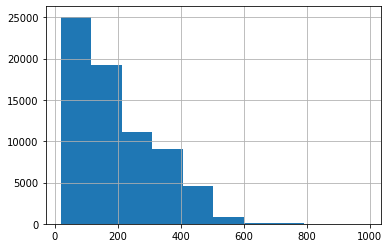

In [74]:
y.hist()

In [76]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(study.best_trial)
    

[I 2023-01-28 15:01:44,433] A new study created in memory with name: no-name-39518a8f-4a22-447a-870c-20b3e9d8b3b3
[I 2023-01-28 15:01:46,227] Trial 0 finished with value: 267.4721556822552 and parameters: {'booster': 'gbtree', 'lambda': 0.0032241727124954138, 'alpha': 0.0013505231601821765, 'subsample': 0.9146663221229872, 'colsample_bytree': 0.531458635402799, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.00043337718744662477, 'gamma': 0.0006682667432055363, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 267.4721556822552.
[I 2023-01-28 15:01:46,830] Trial 1 finished with value: 268.33035762768367 and parameters: {'booster': 'gbtree', 'lambda': 0.3390804802880428, 'alpha': 7.155616628921717e-05, 'subsample': 0.26568458355968105, 'colsample_bytree': 0.22237717022826625, 'max_depth': 5, 'min_child_weight': 10, 'eta': 9.67221182258595e-08, 'gamma': 2.689393451100679e-06, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 267.4721556822552.
[I 2023-01-28 15:01:48,386] Tr

FrozenTrial(number=41, state=TrialState.COMPLETE, values=[53.179341429552565], datetime_start=datetime.datetime(2023, 1, 28, 15, 2, 36, 155774), datetime_complete=datetime.datetime(2023, 1, 28, 15, 2, 37, 48758), params={'booster': 'gbtree', 'lambda': 0.2837120734572297, 'alpha': 0.011428417362317167, 'subsample': 0.9288066499673949, 'colsample_bytree': 0.35034463915540903, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.8785202676624235, 'gamma': 1.9838100767749013e-08, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'm

In [77]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": "gbtree",
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(study.best_trial)
    

[I 2023-01-28 15:06:39,501] A new study created in memory with name: no-name-705695bc-93a7-4a2f-a35d-d9a46b4e83a0
[I 2023-01-28 15:06:40,767] Trial 0 finished with value: 268.3301401339731 and parameters: {'lambda': 1.1511141094253294e-05, 'alpha': 2.3012391521746335e-08, 'subsample': 0.637276924632548, 'colsample_bytree': 0.6680943347950421, 'max_depth': 5, 'min_child_weight': 3, 'eta': 4.457233356854248e-05, 'gamma': 0.9154059978324512, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.3301401339731.
[I 2023-01-28 15:06:41,392] Trial 1 finished with value: 63.596739844032406 and parameters: {'lambda': 8.562395869023687e-08, 'alpha': 0.1875839712804914, 'subsample': 0.2541346639431845, 'colsample_bytree': 0.404222461496651, 'max_depth': 3, 'min_child_weight': 9, 'eta': 0.7484174892117669, 'gamma': 0.3302628156833995, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 63.596739844032406.
[I 2023-01-28 15:06:42,859] Trial 2 finished with value: 268.3305041980134 and par

FrozenTrial(number=26, state=TrialState.COMPLETE, values=[35.46088256311352], datetime_start=datetime.datetime(2023, 1, 28, 15, 7, 8, 222096), datetime_complete=datetime.datetime(2023, 1, 28, 15, 7, 9, 157655), params={'lambda': 2.2041284462613256e-06, 'alpha': 0.9958470363108737, 'subsample': 0.20815384960264127, 'colsample_bytree': 0.7500861065404553, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.9158122797472792, 'gamma': 0.014514030077086447, 'grow_policy': 'lossguide'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'min_child_weight': IntDistribution(high=10, log=False, low=2, step=1), 'eta': FloatDistr

In [78]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": "dart",
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(study.best_trial)
    

[I 2023-01-28 15:09:13,367] A new study created in memory with name: no-name-ac40964f-daaa-46c0-89e1-81372b07dab4
[I 2023-01-28 15:09:15,257] Trial 0 finished with value: 268.32538840889964 and parameters: {'lambda': 0.0033055109890595623, 'alpha': 0.0004910489524931926, 'subsample': 0.9169101077236672, 'colsample_bytree': 0.7467930467230539, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.0005887881091443324, 'gamma': 9.167150553244891e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.32538840889964.
[I 2023-01-28 15:09:16,702] Trial 1 finished with value: 268.3305026461597 and parameters: {'lambda': 2.2264796330927204e-06, 'alpha': 7.601597700540732e-07, 'subsample': 0.33271528171178066, 'colsample_bytree': 0.6199834380392208, 'max_depth': 5, 'min_child_weight': 3, 'eta': 2.8101387362456797e-06, 'gamma': 2.1053925658205585e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.32538840889964.
[I 2023-01-28 15:09:17,805] Trial 2 finished with value: 268.1090

FrozenTrial(number=96, state=TrialState.COMPLETE, values=[43.2582064747113], datetime_start=datetime.datetime(2023, 1, 28, 15, 11, 22, 666913), datetime_complete=datetime.datetime(2023, 1, 28, 15, 11, 24, 320951), params={'lambda': 2.4687076372573688e-08, 'alpha': 0.0018929483131625013, 'subsample': 0.6444347308260332, 'colsample_bytree': 0.35424766134689795, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.6481487849418094, 'gamma': 0.00636977999944088, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'min_child_weight': IntDistribution(high=10, log=False, low=2, step=1), 'eta': Float

In [79]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=125)

print(study.best_trial)
    

[I 2023-01-28 15:12:07,913] A new study created in memory with name: no-name-e7817205-0df0-4638-9b03-ba745ea21eff
[I 2023-01-28 15:12:09,397] Trial 0 finished with value: 268.3297823948384 and parameters: {'booster': 'gbtree', 'lambda': 1.354284558628571e-07, 'alpha': 9.00451124233065e-07, 'subsample': 0.22649995160700406, 'colsample_bytree': 0.9586966667515575, 'max_depth': 7, 'min_child_weight': 8, 'eta': 8.574732667052351e-05, 'gamma': 0.0031475233706248543, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.3297823948384.
[I 2023-01-28 15:12:10,652] Trial 1 finished with value: 268.32173419136666 and parameters: {'booster': 'gbtree', 'lambda': 0.025813950904241625, 'alpha': 3.716197916137949e-05, 'subsample': 0.3003066083536249, 'colsample_bytree': 0.8782098533939247, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.0010033524487053794, 'gamma': 0.16952173630235434, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 268.32173419136666.
[I 2023-01-28 15:12:11,852] Tri

FrozenTrial(number=24, state=TrialState.COMPLETE, values=[35.68340274472841], datetime_start=datetime.datetime(2023, 1, 28, 15, 12, 55, 689623), datetime_complete=datetime.datetime(2023, 1, 28, 15, 12, 58, 72740), params={'booster': 'dart', 'lambda': 2.1021599245706473e-07, 'alpha': 0.10944448326967769, 'subsample': 0.9057515423913649, 'colsample_bytree': 0.9188753224605535, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.8505547698940092, 'gamma': 5.727918927357975e-07, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'm

In [80]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart", "gblinear"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print(study.best_trial)
    

[I 2023-01-28 15:18:02,085] A new study created in memory with name: no-name-325e887a-3d79-4d28-b38e-1dee64af77ac
[I 2023-01-28 15:18:03,436] Trial 0 finished with value: 268.3305228782793 and parameters: {'booster': 'dart', 'lambda': 8.972142970939512e-06, 'alpha': 0.0038406832416463957, 'subsample': 0.6001797221926064, 'colsample_bytree': 0.25335283753178506, 'max_depth': 7, 'min_child_weight': 10, 'eta': 4.752199672075359e-07, 'gamma': 0.8959434234192493, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.3305228782793.
[I 2023-01-28 15:18:03,854] Trial 1 finished with value: 268.328380891642 and parameters: {'booster': 'gblinear', 'lambda': 0.0031838176182587114, 'alpha': 0.06955840209475883, 'subsample': 0.23576147760335964, 'colsample_bytree': 0.7893890428271497, 'max_depth': 7, 'min_child_weight': 2, 'eta': 3.0204156714172486e-05, 'gamma': 7.511384679036927e-06, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 268.328380891642.
[I 2023-01-28 15:18:05,533] Trial

FrozenTrial(number=45, state=TrialState.COMPLETE, values=[46.95920061822531], datetime_start=datetime.datetime(2023, 1, 28, 15, 18, 45, 10167), datetime_complete=datetime.datetime(2023, 1, 28, 15, 18, 46, 459823), params={'booster': 'gbtree', 'lambda': 3.4460228082114167e-06, 'alpha': 0.0006858155226410186, 'subsample': 0.5877117648383541, 'colsample_bytree': 0.5015403570312859, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.9922935953158059, 'gamma': 1.1570712790976534e-05, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, l

In [ ]:
 params={'booster': 'dart', 'lambda': 3.893865794445869e-08, 'alpha': 4.6070208466639235e-07, 
         'subsample': 0.9241613710850286, 'colsample_bytree': 0.39560283912845984, 'max_depth': 7, 
         'min_child_weight': 6, 'eta': 0.9883868625667162, 'gamma': 5.030807801518731e-08, 
         'grow_policy': 'lossguide'}, user_attrs={}, system_attrs={},
    intermediate_values={},
    distributions={'booster': 
                   CategoricalDistribution(choices=('gbtree', 'dart')), 
                   'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 
                   'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 
                   'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 
                   'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None),
                   'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 
                   'min_child_weight': IntDistribution(high=10, log=False, low=2, step=1),
                   'eta': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 
                   'gamma': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 
                   'grow_policy':
 CategoricalDistribution(choices=('depthwise', 'lossguide'))}, trial_id=26, value=None)

In [81]:
X.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [82]:
dfinal = xgb.DMatrix(X, label=y)

param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": "dart",
        # L2 regularization weight.
        "lambda": 3.893865794445869e-08,
        # L1 regularization weight.
        "alpha": 4.6070208466639235e-07,
        # sampling ratio for training data.
        "subsample": 0.9241613710850286,
        # sampling according to each tree.
        "colsample_bytree": 0.39560283912845984,
        "max_depth": 7,
        "min_child_weight": 6,
        "eta": 0.9883868625667162,
        "gamma": 5.030807801518731e-08,
        "grow_policy": 'lossguide'
        }


final_model = xgb.train(param, dfinal)




/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [83]:
test_df = pd.read_csv('/Users/alecclarkfeather/Downloads/store_forecast/test.csv')
test_df.head(15)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started


In [84]:
test_df['date_dt'] = pd.to_datetime(test_df['date'])

test_df['year_num'] = test_df['date_dt'].dt.year
test_df['month_num'] = test_df['date_dt'].dt.month
test_df['day_num'] = test_df['date_dt'].dt.day

In [85]:
for holiday in belgium_holiday_df['holiday_name'].unique():
    
    test_df[f'BE_holiday_{holiday}'] = 0
    
for holiday in german_holiday_df['holiday_name'].unique():
    
    test_df[f'GE_holiday_{holiday}'] = 0
    
for holiday in polish_holiday_df['holiday_name'].unique():
    
    test_df[f'PO_holiday_{holiday}'] = 0
    
for holiday in spanish_holiday_df['holiday_name'].unique():
    
    test_df[f'SP_holiday_{holiday}'] = 0
    
for holiday in french_holiday_df['holiday_name'].unique():
    
    test_df[f'FR_holiday_{holiday}'] = 0
    
for holiday in italian_holiday_df['holiday_name'].unique():
    
    test_df[f'IT_holiday_{holiday}'] = 0

In [86]:
for i in range(len(test_df)):
    
    for j1 in range(len(belgium_holiday_df)):
        
        be_date = str(belgium_holiday_df.loc[j1, 'date'])
        be_name = belgium_holiday_df.loc[j1, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == be_date:
            
            test_df.loc[i, f'BE_holiday_{be_name}'] = 1
            
    for j2 in range(len(german_holiday_df)):
        
        ge_date = str(german_holiday_df.loc[j2, 'date'])
        ge_name = german_holiday_df.loc[j2, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == ge_date:
            
            test_df.loc[i, f'GE_holiday_{ge_name}'] = 1
            
    for j3 in range(len(polish_holiday_df)):
        
        po_date = str(polish_holiday_df.loc[j3, 'date'])
        po_name = polish_holiday_df.loc[j3, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == po_date:
            
            test_df.loc[i, f'PO_holiday_{po_name}'] = 1
            
    for j4 in range(len(french_holiday_df)):
        
        fr_date = str(french_holiday_df.loc[j4, 'date'])
        fr_name = french_holiday_df.loc[j4, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == fr_date:
            
            test_df.loc[i, f'FR_holiday_{fr_name}'] = 1
            
    for j5 in range(len(spanish_holiday_df)):
        
        sp_date = str(spanish_holiday_df.loc[j5, 'date'])
        sp_name = spanish_holiday_df.loc[j5, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == sp_date:
            
            test_df.loc[i, f'SP_holiday_{sp_name}'] = 1
            
    for j6 in range(len(italian_holiday_df)):
        
        it_date = str(italian_holiday_df.loc[j6, 'date'])
        it_name = italian_holiday_df.loc[j6, 'holiday_name']
        
        if str(test_df.loc[i, 'date']) == it_date:
            
            test_df.loc[i, f'IT_holiday_{it_name}'] = 1

In [88]:
test_df_dummies = test_df[['country', 'store', 'product']]

test_df_dummies_onehot = pd.get_dummies(test_df_dummies, drop_first=True)

test_df_dummies_onehot.head()

,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [89]:
train_df_dummies_onehot.head()

,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [90]:
test_df_mod = pd.concat([test_df, test_df_dummies_onehot], axis=1)
test_df_mod.head(15)

,row_id,date,country,store,product,date_dt,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,...,IT_holiday_Santo Stefano,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,1,1,0,0
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,1,0,1,0
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,1,0,0,1
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,1,0,0,0,0,0,0,0,0
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started,2021-01-01,2021,1,1,1,...,0,1,0,0,0,0,0,1,0,0


In [91]:
test_df_mod['dayofweek'] = test_df_mod['date_dt'].dt.dayofweek
test_df_mod['dayofweek'].head()

0    4
1    4
2    4
3    4
4    4
Name: dayofweek, dtype: int64

In [92]:
test_df_mod['is_weekend'] = test_df_mod['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

test_df_mod[['is_weekend', 'dayofweek']].head()

,is_weekend,dayofweek
0,0,4
1,0,4
2,0,4
3,0,4
4,0,4


In [93]:
test_df_mod['covid_effect'] = 1

In [94]:
test_copy = test_df_mod.copy()
test_copy.head()

,row_id,date,country,store,product,date_dt,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,...,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,0,4,0,1
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,2021-01-01,2021,1,1,1,...,0,0,0,0,1,0,0,4,0,1
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,2021-01-01,2021,1,1,1,...,0,0,0,0,0,1,0,4,0,1
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021-01-01,2021,1,1,1,...,0,0,0,0,0,0,1,4,0,1
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,0,0,1,0,0,0,4,0,1


In [95]:
enc_cols = ['month_num', 'day_num', 'dayofweek']

for col in enc_cols:
    
    test_copy[f'sin_{col}'] = np.sin(test_copy[col])
    test_copy[f'cos_{col}'] = np.cos(test_copy[col])
    
test_copy.head()

,row_id,date,country,store,product,date_dt,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,2021-01-01,2021,1,1,1,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,2021-01-01,2021,1,1,1,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021-01-01,2021,1,1,1,...,1,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,2021-01-01,2021,1,1,1,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644


In [97]:
train_set.shape

(70128, 98)

In [98]:
test_set = test_copy.drop(columns=['row_id', 'date', 'country', 'store',
                                    'date_dt', 'product'], axis=1)

test_set.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
1,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
2,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
3,2021,1,1,1,0,0,0,0,0,0,...,1,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
4,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644


In [100]:
final_preds = final_model.predict(xgb.DMatrix(test_set))

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [101]:
final_preds

array([381.25067, 364.08124, 286.16022, ..., 160.14198, 170.46431,
       273.6151 ], dtype=float32)

In [102]:
test_id_df = test_copy[['row_id']]
test_id_df

,row_id
0,70128
1,70129
2,70130
3,70131
4,70132
...,...
17515,87643
17516,87644
17517,87645
17518,87646


In [103]:
test_id_df['pred'] = final_preds
test_id_df

<ipython-input-103-8e7aaf2de0c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['pred'] = final_preds


,row_id,pred
0,70128,381.250671
1,70129,364.081238
2,70130,286.160217
3,70131,439.883209
4,70132,143.579163
...,...,...
17515,87643,696.044434
17516,87644,228.860062
17517,87645,160.141983
17518,87646,170.464310


In [104]:
test_id_df.columns = ['row_id', 'num_sold']
test_id_df

,row_id,num_sold
0,70128,381.250671
1,70129,364.081238
2,70130,286.160217
3,70131,439.883209
4,70132,143.579163
...,...,...
17515,87643,696.044434
17516,87644,228.860062
17517,87645,160.141983
17518,87646,170.464310


In [105]:
test_id_df.to_csv('forecast_submission1.csv', index=False)

In [106]:
X.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [107]:
X.columns

Index(['year_num', 'month_num', 'day_num', 'BE_holiday_Nieuwjaarsdag',
       'BE_holiday_Pasen', 'BE_holiday_Paasmaandag',
       'BE_holiday_O.L.H. Hemelvaart', 'BE_holiday_Pinksteren',
       'BE_holiday_Pinkstermaandag', 'BE_holiday_Dag van de Arbeid',
       'BE_holiday_Nationale feestdag', 'BE_holiday_O.L.V. Hemelvaart',
       'BE_holiday_Allerheiligen', 'BE_holiday_Wapenstilstand',
       'BE_holiday_Kerstmis', 'GE_holiday_Neujahr', 'GE_holiday_Karfreitag',
       'GE_holiday_Ostermontag', 'GE_holiday_Erster Mai',
       'GE_holiday_Christi Himmelfahrt', 'GE_holiday_Pfingstmontag',
       'GE_holiday_Tag der Deutschen Einheit', 'GE_holiday_Reformationstag',
       'GE_holiday_Erster Weihnachtstag', 'GE_holiday_Zweiter Weihnachtstag',
       'PO_holiday_Nowy Rok', 'PO_holiday_Święto Trzech Króli',
       'PO_holiday_Niedziela Wielkanocna',
       'PO_holiday_Poniedziałek Wielkanocny', 'PO_holiday_Święto Państwowe',
       'PO_holiday_Święto Narodowe Trzeciego Maja',
       'PO_h

In [110]:
#X_mod2 = X.drop(columns=['month_num', 'day_num', 'year_num', 'dayofweek'], axis=1)
#X_mod2.head()

In [111]:
#y.head()

In [112]:
X_train.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [113]:
X_train_mod2 = X_train.drop(columns=['month_num', 'day_num', 'year_num', 'dayofweek'], axis=1)
X_train_mod2.head()

,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,BE_holiday_Nationale feestdag,BE_holiday_O.L.V. Hemelvaart,BE_holiday_Allerheiligen,...,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [114]:
y_train.head()

0    663
1    615
2    480
3    710
4    240
Name: num_sold, dtype: int64

In [115]:
X_val_mod2 = X_val.drop(columns=['month_num', 'day_num', 'year_num', 'dayofweek'], axis=1)
X_val_mod2.head()

,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,BE_holiday_Nationale feestdag,BE_holiday_O.L.V. Hemelvaart,BE_holiday_Allerheiligen,...,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
65712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65714,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65715,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992
65716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-0.544021,-0.839072,0.841471,0.540302,0.14112,-0.989992


In [116]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train_mod2, label=y_train)
    dvalid = xgb.DMatrix(X_val_mod2, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print(study.best_trial)
    

[I 2023-01-28 16:01:59,689] A new study created in memory with name: no-name-252c9ef3-1435-4d98-b4e0-bd5b39ea955a
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2023-01-28 16:02:00,950] Trial 0 finished with value: 110.59211406027596 and parameters: {'booster': 'dart', 'lambda': 0.07160929316013045, 'alpha': 0.00017134367195655422, 'subsample': 0.4043609214292861, 'colsample_bytree': 0.21895897412214493, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.5252475860935234, 'gamma': 0.00010767356115788382, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 110.59211406027596.
[I 2023-01-28 16:02:02,083] Trial 1 finished with value: 268.3300762284707 and parameters: {'booster': 'dart', 'lambda': 0.0004605264520738425, 'alpha': 0.

FrozenTrial(number=28, state=TrialState.COMPLETE, values=[44.84675126858398], datetime_start=datetime.datetime(2023, 1, 28, 16, 2, 41, 825030), datetime_complete=datetime.datetime(2023, 1, 28, 16, 2, 44, 793924), params={'booster': 'dart', 'lambda': 2.451227822567133e-06, 'alpha': 0.020838276529370713, 'subsample': 0.4783775071756283, 'colsample_bytree': 0.9882161056994931, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.9703019507243079, 'gamma': 0.0010808071637618691, 'grow_policy': 'lossguide'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'mi

In [117]:
X_train.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [118]:
X_train_mod3 = X_train.loc[(X_train['year_num']>=2019)]
y_train_mod3 = y_train.loc[(X_train['year_num']>=2019)]

In [119]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train_mod3, label=y_train_mod3)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print(study.best_trial)
    

[I 2023-01-28 16:11:58,839] A new study created in memory with name: no-name-0ebb96a3-5a36-4ef7-9350-3ee3418fef6b
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2023-01-28 16:11:59,383] Trial 0 finished with value: 268.32991462449274 and parameters: {'booster': 'gbtree', 'lambda': 0.04715803060992142, 'alpha': 0.002749085124737328, 'subsample': 0.8012720283697743, 'colsample_bytree': 0.48284597390344297, 'max_depth': 9, 'min_child_weight': 6, 'eta': 7.054191908628351e-05, 'gamma': 1.4337763596234502e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 268.32991462449274.
[I 2023-01-28 16:12:00,297] Trial 1 finished with value: 268.329388620443 and parameters: {'booster': 'gbtree', 'lambda': 0.022687179829426668, 'alpha':

FrozenTrial(number=71, state=TrialState.COMPLETE, values=[34.887083712191576], datetime_start=datetime.datetime(2023, 1, 28, 16, 12, 55, 297319), datetime_complete=datetime.datetime(2023, 1, 28, 16, 12, 56, 196483), params={'booster': 'dart', 'lambda': 2.2266970177724248e-07, 'alpha': 0.19227102295370507, 'subsample': 0.2240791600134491, 'colsample_bytree': 0.8657490962385596, 'max_depth': 7, 'min_child_weight': 9, 'eta': 0.9766407394054972, 'gamma': 0.10275905188894, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'min_

In [120]:
X_train.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
1,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
2,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
3,2017,1,1,1,0,0,0,0,0,0,...,1,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017
4,2017,1,1,1,0,0,0,0,0,0,...,0,6,1,0,0.841471,0.540302,0.841471,0.540302,-0.279415,0.96017


In [121]:
to_remove = [col for col in X_train.columns if col.startswith('sin') or col.startswith('cos')]
to_remove

['sin_month_num',
 'cos_month_num',
 'sin_day_num',
 'cos_day_num',
 'sin_dayofweek',
 'cos_dayofweek']

In [122]:
X_train_mod4 = X_train.drop(columns=to_remove, axis=1)

In [123]:
X_val_mod4 = X_val.drop(columns=to_remove, axis=1)

In [124]:
X_train_mod4['sin_month_num'] = np.sin(X_train_mod4['month_num']*np.pi/24)
X_train_mod4['cos_month_num'] = np.cos(X_train_mod4['month_num']*np.pi/24)    
X_train_mod4['sin_day_num'] = np.sin(X_train_mod4['day_num']*np.pi/62)
X_train_mod4['cos_month_num'] = np.cos(X_train_mod4['day_num']*np.pi/62)
X_train_mod4['sin_dayofweek'] = np.sin(X_train_mod4['dayofweek']*np.pi/14)
X_train_mod4['cos_dayofweek'] = np.cos(X_train_mod4['dayofweek']*np.pi/14)
    

In [125]:
X_val_mod4['sin_month_num'] = np.sin(X_val_mod4['month_num']*np.pi/24)
X_val_mod4['cos_month_num'] = np.cos(X_val_mod4['month_num']*np.pi/24)    
X_val_mod4['sin_day_num'] = np.sin(X_val_mod4['day_num']*np.pi/62)
X_val_mod4['cos_month_num'] = np.cos(X_val_mod4['day_num']*np.pi/62)
X_val_mod4['sin_dayofweek'] = np.sin(X_val_mod4['dayofweek']*np.pi/14)
X_val_mod4['cos_dayofweek'] = np.cos(X_val_mod4['dayofweek']*np.pi/14)

In [127]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train_mod4, label=y_train)
    dvalid = xgb.DMatrix(X_val_mod4, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print(study.best_trial)
    

[I 2023-01-28 16:32:18,080] A new study created in memory with name: no-name-11a07855-e201-4b80-a780-b3fb94474bb2
[I 2023-01-28 16:32:21,425] Trial 0 finished with value: 268.33051690278194 and parameters: {'booster': 'dart', 'lambda': 2.588726545435316e-06, 'alpha': 0.00020294541895410706, 'subsample': 0.7194894749476777, 'colsample_bytree': 0.8509503232652222, 'max_depth': 9, 'min_child_weight': 9, 'eta': 1.166269571518825e-06, 'gamma': 0.10160881961575512, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 268.33051690278194.
[I 2023-01-28 16:32:22,144] Trial 1 finished with value: 266.8188136252181 and parameters: {'booster': 'gbtree', 'lambda': 3.0057513692947185e-07, 'alpha': 0.39659443224164287, 'subsample': 0.50788178772931, 'colsample_bytree': 0.34403770224650976, 'max_depth': 5, 'min_child_weight': 10, 'eta': 0.07572419439045834, 'gamma': 0.0051773488340190075, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 266.8188136252181.
[I 2023-01-28 16:32:23,294] Trial 

FrozenTrial(number=39, state=TrialState.COMPLETE, values=[30.935555499155676], datetime_start=datetime.datetime(2023, 1, 28, 16, 33, 0, 591411), datetime_complete=datetime.datetime(2023, 1, 28, 16, 33, 1, 878927), params={'booster': 'dart', 'lambda': 7.90271527509009e-05, 'alpha': 6.825052940039878e-06, 'subsample': 0.3126408510229135, 'colsample_bytree': 0.3384116008123751, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.9983938200892389, 'gamma': 1.345141236267107e-05, 'grow_policy': 'depthwise'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 'm

In [ ]:
params={'booster': 'dart', 'lambda': 7.90271527509009e-05,
        'alpha': 6.825052940039878e-06, 'subsample': 0.3126408510229135,
        'colsample_bytree': 0.3384116008123751, 'max_depth': 5, 
        'min_child_weight': 8, 'eta': 0.9983938200892389,
        'gamma': 1.345141236267107e-05, 'grow_policy': 'depthwise'}



In [ ]:
#dtrain = xgb.DMatrix(X_train_mod4, label=y_train)
#dvalid = xgb.DMatrix(X_val_mod4, label=y_val)

In [128]:
X_attempt2 = pd.concat([X_train_mod4, X_val_mod4], axis=0, ignore_index=True)

In [129]:
dfinal = xgb.DMatrix(X_attempt2, label=y)

params={'booster': 'dart', 'lambda': 7.90271527509009e-05,
        'alpha': 6.825052940039878e-06, 'subsample': 0.3126408510229135,
        'colsample_bytree': 0.3384116008123751, 'max_depth': 5, 
        'min_child_weight': 8, 'eta': 0.9983938200892389,
        'gamma': 1.345141236267107e-05, 'grow_policy': 'depthwise'}


final_model = xgb.train(params, dfinal)

In [139]:
X_attempt2.tail()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,sin_dayofweek,cos_dayofweek
70123,2020,12,31,0,0,0,0,0,0,0,...,0,1,3,0,1,1.0,6.123234e-17,1.0,0.62349,0.781831
70124,2020,12,31,0,0,0,0,0,0,0,...,0,0,3,0,1,1.0,6.123234e-17,1.0,0.62349,0.781831
70125,2020,12,31,0,0,0,0,0,0,0,...,0,0,3,0,1,1.0,6.123234e-17,1.0,0.62349,0.781831
70126,2020,12,31,0,0,0,0,0,0,0,...,1,0,3,0,1,1.0,6.123234e-17,1.0,0.62349,0.781831
70127,2020,12,31,0,0,0,0,0,0,0,...,0,1,3,0,1,1.0,6.123234e-17,1.0,0.62349,0.781831


In [130]:
test_set.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,cos_day_num,sin_dayofweek,cos_dayofweek
0,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
1,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
2,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
3,2021,1,1,1,0,0,0,0,0,0,...,1,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644
4,2021,1,1,1,0,0,0,0,0,0,...,0,4,0,1,0.841471,0.540302,0.841471,0.540302,-0.756802,-0.653644


In [131]:
test_attempt2 = test_set.drop(columns=to_remove, axis=1)
test_attempt2.head()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,country_Italy,country_Poland,country_Spain,store_KaggleRama,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect
0,2021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,1
1,2021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4,0,1
2,2021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,4,0,1
3,2021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,0,1
4,2021,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,0,1


In [132]:
test_attempt2['sin_month_num'] = np.sin(test_attempt2['month_num']*np.pi/24)
test_attempt2['cos_month_num'] = np.cos(test_attempt2['month_num']*np.pi/24)    
test_attempt2['sin_day_num'] = np.sin(test_attempt2['day_num']*np.pi/62)
test_attempt2['cos_month_num'] = np.cos(test_attempt2['day_num']*np.pi/62)
test_attempt2['sin_dayofweek'] = np.sin(test_attempt2['dayofweek']*np.pi/14)
test_attempt2['cos_dayofweek'] = np.cos(test_attempt2['dayofweek']*np.pi/14)

In [133]:
final_preds2 = final_model.predict(xgb.DMatrix(test_attempt2))

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [134]:
test_id_df = test_copy[['row_id']]
test_id_df

,row_id
0,70128
1,70129
2,70130
3,70131
4,70132
...,...
17515,87643
17516,87644
17517,87645
17518,87646


In [135]:
test_id_df['num_sold'] = final_preds2

<ipython-input-135-546aedfc9486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['num_sold'] = final_preds2


In [136]:
test_id_df

,row_id,num_sold
0,70128,570.352051
1,70129,463.985748
2,70130,461.864899
3,70131,600.392822
4,70132,255.207123
...,...,...
17515,87643,648.195557
17516,87644,276.448517
17517,87645,234.568954
17518,87646,178.877945


In [137]:
test_id_df.to_csv('forecast_submission2.csv', index=False)

In [143]:
X_attempt3 = X_attempt2[X_attempt2['year_num']<2020]
y_attempt3 = y[X_attempt2['year_num']<2020]

In [144]:
X_attempt3.tail()

,year_num,month_num,day_num,BE_holiday_Nieuwjaarsdag,BE_holiday_Pasen,BE_holiday_Paasmaandag,BE_holiday_O.L.H. Hemelvaart,BE_holiday_Pinksteren,BE_holiday_Pinkstermaandag,BE_holiday_Dag van de Arbeid,...,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,dayofweek,is_weekend,covid_effect,sin_month_num,cos_month_num,sin_day_num,sin_dayofweek,cos_dayofweek
52555,2019,12,31,0,0,0,0,0,0,0,...,0,1,1,0,0,1.0,6.123234e-17,1.0,0.222521,0.974928
52556,2019,12,31,0,0,0,0,0,0,0,...,0,0,1,0,0,1.0,6.123234e-17,1.0,0.222521,0.974928
52557,2019,12,31,0,0,0,0,0,0,0,...,0,0,1,0,0,1.0,6.123234e-17,1.0,0.222521,0.974928
52558,2019,12,31,0,0,0,0,0,0,0,...,1,0,1,0,0,1.0,6.123234e-17,1.0,0.222521,0.974928
52559,2019,12,31,0,0,0,0,0,0,0,...,0,1,1,0,0,1.0,6.123234e-17,1.0,0.222521,0.974928


In [145]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_attempt3, label=y_attempt3)
    dvalid = xgb.DMatrix(X_val_mod4, label=y_val)
    
    param = {
        "verbosity": 0,
        "objective": "reg:tweedie",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 9, step=2),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 10),
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        }
    
    bst = xgb.train(param, dtrain)
    
    preds = bst.predict(dvalid)
    
    rmse = np.sqrt(np.mean((y_val - preds)**2))
    
    return rmse
    
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print(study.best_trial)
    

[I 2023-01-28 16:56:59,766] A new study created in memory with name: no-name-52c45540-d709-495b-8a7b-349169d30399
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2023-01-28 16:57:01,265] Trial 0 finished with value: 266.1324578713585 and parameters: {'booster': 'dart', 'lambda': 0.2065475050321057, 'alpha': 3.1990887076783453e-06, 'subsample': 0.38646615536971435, 'colsample_bytree': 0.7481526357593848, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.09139418796901784, 'gamma': 0.7208902836613559, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 266.1324578713585.
[I 2023-01-28 16:57:02,571] Trial 1 finished with value: 268.2712712234553 and parameters: {'booster': 'gbtree', 'lambda': 3.849886098196252e-07, 'alpha': 0.0011

FrozenTrial(number=111, state=TrialState.COMPLETE, values=[84.55302887288487], datetime_start=datetime.datetime(2023, 1, 28, 17, 1, 22, 721669), datetime_complete=datetime.datetime(2023, 1, 28, 17, 1, 25, 995213), params={'booster': 'gbtree', 'lambda': 4.6105680802898174e-05, 'alpha': 0.01912114018994562, 'subsample': 0.902987227882631, 'colsample_bytree': 0.8882851156307162, 'max_depth': 3, 'min_child_weight': 2, 'eta': 0.9592947692523133, 'gamma': 5.6819983999574356e-08, 'grow_policy': 'lossguide'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=2), 